**做了四個方法**

1.羅吉斯

2.羅吉斯+PCA

3.羅吉斯+PCA+加權(1:10)

4.羅吉斯+PCA+SMOTE

羅吉斯是直接讓模型跑，PCA保留全部主成分，有處理不平衡的表現比沒有的好很多，但仍存在FP跟FN。最後顯示風險最高五名

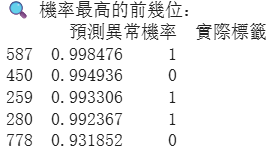

###套件載入

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###資料載入

In [2]:
file_path = "/content/drive/MyDrive/filled_data_label_numeric.xlsx"
filled_data_label_numeric_df = pd.read_excel(file_path,engine='openpyxl')

In [3]:
# 目標欄位
target_col = "abnormal_target"

# 特徵欄位
X = filled_data_label_numeric_df.drop(columns=[target_col])

# 目標變數
y = filled_data_label_numeric_df[target_col]

# 分割數據為訓練集和測試集（80%訓練，20%測試）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"訓練集大小: {X_train.shape[0]}, 測試集大小: {X_test.shape[0]}")

訓練集大小: 3215, 測試集大小: 804


###PCA前的羅吉斯回歸

In [4]:
# 建立羅吉斯回歸模型
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# 預測
y_pred = log_model.predict(X_test)

# 模型評估
print("準確率 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n分類報告 (Classification Report):\n", classification_report(y_test, y_pred))
print("\n混淆矩陣 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))

準確率 (Accuracy): 0.986318407960199

分類報告 (Classification Report):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       795
           1       0.25      0.11      0.15         9

    accuracy                           0.99       804
   macro avg       0.62      0.55      0.57       804
weighted avg       0.98      0.99      0.98       804


混淆矩陣 (Confusion Matrix):
 [[792   3]
 [  8   1]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##PCA後的動作

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 設定要保留的主成分數量，這裡設置為所有主成分
pca = PCA(n_components=min(X_scaled.shape[0], X_scaled.shape[1]))
X_pca = pca.fit_transform(X_scaled)

# 查看每個主成分的解釋變異量
print("解釋變異量：", pca.explained_variance_ratio_)

解釋變異量： [1.88340374e-01 6.53890992e-02 4.27871524e-02 3.85686355e-02
 3.20250114e-02 2.61227411e-02 2.46467268e-02 1.98570294e-02
 1.87718380e-02 1.75860429e-02 1.74815699e-02 1.71477908e-02
 1.65428774e-02 1.61961702e-02 1.57757945e-02 1.56658593e-02
 1.48977747e-02 1.45484508e-02 1.42738185e-02 1.40908583e-02
 1.38373697e-02 1.36685375e-02 1.34631330e-02 1.29886078e-02
 1.28493360e-02 1.26486871e-02 1.23333010e-02 1.20681684e-02
 1.19699697e-02 1.17083945e-02 1.12684063e-02 1.10071940e-02
 1.06443055e-02 1.04611527e-02 1.01174553e-02 1.00242615e-02
 9.64570483e-03 9.43078096e-03 9.32221707e-03 8.85228819e-03
 8.74935936e-03 8.70358974e-03 8.64991642e-03 8.35541199e-03
 7.93140451e-03 7.69516212e-03 7.54484191e-03 7.23188470e-03
 7.02158415e-03 6.82062964e-03 6.43738366e-03 6.42185437e-03
 6.21698873e-03 6.06606613e-03 5.85557293e-03 5.15913432e-03
 4.95396851e-03 4.04356299e-03 3.87308938e-03 3.52150466e-03
 2.75361622e-03 2.19940864e-03 2.10993746e-03 1.85263028e-03
 7.01201767e-04 1

###純PCA+羅吉斯

In [6]:
# 分割 PCA 後的資料集
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 建立模型
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_pca_train, y_train)

# 預測
y_pred = log_model.predict(X_pca_test)

# 評估
print("準確率 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n分類報告 (Classification Report):\n", classification_report(y_test, y_pred))
print("\n混淆矩陣 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))

準確率 (Accuracy): 0.9875621890547264

分類報告 (Classification Report):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       795
           1       0.45      0.56      0.50         9

    accuracy                           0.99       804
   macro avg       0.72      0.77      0.75       804
weighted avg       0.99      0.99      0.99       804


混淆矩陣 (Confusion Matrix):
 [[789   6]
 [  4   5]]


###PCA+羅吉斯+加權法處理不平衡(1:10)

In [7]:
weights = {0: 1, 1: 10} #有問題的業務員加權10倍
log_model_weighted = LogisticRegression(max_iter=1000, class_weight=weights)
log_model_weighted.fit(X_pca_train, y_train)

# 預測與評估
y_pred_weighted = log_model_weighted.predict(X_pca_test)
print("🔴 方法一：加權")
print("準確率:", accuracy_score(y_test, y_pred_weighted))
print("分類報告:\n", classification_report(y_test, y_pred_weighted))
print("混淆矩陣:\n", confusion_matrix(y_test, y_pred_weighted))

🔴 方法一：加權
準確率: 0.9912935323383084
分類報告:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       795
           1       0.62      0.56      0.59         9

    accuracy                           0.99       804
   macro avg       0.81      0.78      0.79       804
weighted avg       0.99      0.99      0.99       804

混淆矩陣:
 [[792   3]
 [  4   5]]


###PCA+羅吉斯+SMOTE重採樣

In [8]:
# 重採樣
smote = SMOTE(random_state=42)
X_pca_train_res, y_train_res = smote.fit_resample(X_pca_train, y_train)

# 訓練模型
log_model_resampled = LogisticRegression(max_iter=1000)
log_model_resampled.fit(X_pca_train_res, y_train_res)

# 預測與評估
y_pred_resampled = log_model_resampled.predict(X_pca_test)
print("\n🟢 方法二：SMOTE重採樣")
print("準確率:", accuracy_score(y_test, y_pred_resampled))
print("分類報告:\n", classification_report(y_test, y_pred_resampled))
print("混淆矩陣:\n", confusion_matrix(y_test, y_pred_resampled))


🟢 方法二：SMOTE重採樣
準確率: 0.9912935323383084
分類報告:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       795
           1       0.62      0.56      0.59         9

    accuracy                           0.99       804
   macro avg       0.81      0.78      0.79       804
weighted avg       0.99      0.99      0.99       804

混淆矩陣:
 [[792   3]
 [  4   5]]


###PCA+羅吉斯+加權法 呈現機率並顯示機率為大10筆

In [9]:
# 預測每人為異常 (abnormal_target=1) 的機率
proba_weighted = log_model_weighted.predict_proba(X_pca_test)[:, 1]  # 取出第1類的機率

# 建立 DataFrame 呈現結果（你也可以加上 ID、index 或其他欄位）
import pandas as pd

prob_df = pd.DataFrame({
    '預測異常機率': proba_weighted,
    '實際標籤': y_test.values
})

# 顯示前幾筆
print(prob_df.head())

# 如需排序（看誰最有可能異常）
prob_df_sorted = prob_df.sort_values(by='預測異常機率', ascending=False)
print("\n🔍 機率最高的前幾位：")
print(prob_df_sorted.head())

         預測異常機率  實際標籤
0  2.262200e-04     0
1  4.613391e-04     0
2  6.942990e-10     0
3  5.686727e-04     0
4  1.510639e-04     0

🔍 機率最高的前幾位：
       預測異常機率  實際標籤
587  0.998476     1
450  0.994936     0
259  0.993306     1
280  0.992367     1
778  0.931852     0
